In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/datacamp-pet-sales/pet_sales.csv


In [2]:
import re

# Data Wrangling

In [3]:
data=pd.read_csv('/kaggle/input/datacamp-pet-sales/pet_sales.csv')

In [4]:
data.head(7)

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0
5,4609,Bedding,"$183,000",51.60,VC_1174,large,cat,10,0
6,4380,Toys,"$79,000",175.75,VC_945,extra_small,dog,8,0


In [5]:
print('shap of data is: ',data.shape)


shap of data is:  (879, 9)


In [6]:
data.describe(include='all')

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
count,879.00000,879,879,879.000000,879,879,879,879.000000,879.000000
unique,NaN,11,224,NaN,879,5,6,NaN,NaN
top,NaN,Equipment,"$25,000",NaN,VC_1605,small,cat,NaN,NaN
freq,NaN,141,12,NaN,1,280,347,NaN,NaN
mean,4611.00000,NaN,NaN,128.212253,NaN,NaN,NaN,6.500569,0.466439
std,253.88974,NaN,NaN,71.923583,NaN,NaN,NaN,2.852835,0.499156
min,4172.00000,NaN,NaN,0.350000,NaN,NaN,NaN,1.000000,0.000000
25%,4391.50000,NaN,NaN,65.210000,NaN,NaN,NaN,5.000000,0.000000
50%,4611.00000,NaN,NaN,129.520000,NaN,NaN,NaN,6.000000,0.000000
75%,4830.50000,NaN,NaN,188.220000,NaN,NaN,NaN,10.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    object 
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 61.9+ KB


In [8]:
print( 'total number of products:',len(data['product_id'].unique()))

total number of products: 879


In [9]:
data.isnull().sum()

product_id          0
product_category    0
sales               0
price               0
vendor_id           0
pet_size            0
pet_type            0
rating              0
re_buy              0
dtype: int64

In [10]:
data.dtypes

product_id            int64
product_category     object
sales                object
price               float64
vendor_id            object
pet_size             object
pet_type             object
rating                int64
re_buy                int64
dtype: object

# Data Cleaning
* changed sales column to integer
* Also changed product_Id column to string

In [11]:
data['sales']=  data['sales'].apply( lambda sale: re.sub("[^0-9]", "", sale)   )
data['sales']=  data['sales'].apply( lambda sale: int(sale)   )
data['product_id']=  data['product_id'].apply( lambda pid: str(pid)   )
data.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,1
1,4567,Toys,61000,120.95,VC_1132,small,cat,10,0
2,4237,Toys,218000,106.34,VC_802,small,hamster,6,0
3,4364,Snack,69000,241.27,VC_929,large,dog,1,1
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,0


I need only 3 categories; dog,fish, and bird and i am going to filter the dataset for them

In [12]:
data=data[(data['pet_type']=='dog')| (data['pet_type']=='cat')| (data['pet_type']=='fish')]
data.shape

(764, 9)

sort the data into two: products with more than one purchase and products with only one purchase

In [13]:
data_r_1=data[data['re_buy']==1]
data_r_0=data[data['re_buy']==0]

In [14]:
data['re_buy'].unique()

array([1, 0])

In [15]:
data_r_1['pet_type'].unique()

array(['fish', 'dog', 'cat'], dtype=object)

# EDA

Get the total number of products which have a resale  and those which do not 

In [16]:
unique_vals= data['re_buy'].unique()
unique_vals_count=[]
unique_vals_names=[]
for x in unique_vals:
    data_x=data[data['re_buy']==x]
    unique_vals_count.append(data_x.shape[0])
    if x==1:
        unique_vals_names.append('Product with at least 2 re_buys:'+ str(data_x.shape[0]))
    else:
        unique_vals_names.append('Product with exactly 1 purchase: '+ str(data_x.shape[0]))
print(unique_vals_count)

[362, 402]


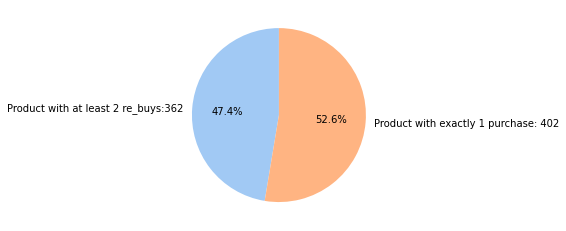

In [17]:
#show plot 
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:7]
plt.pie(unique_vals_count,labels=unique_vals_names,autopct='%1.1f%%',startangle=90,colors=colors)
#plt.legend()
plt.show()

I will do a bar plot showing sales of products purchased with more than once

In [18]:

'''plt.figure(figsize=(28,25))
plt.plot(data_r_1['product_id'],data_r_1['sales'])
plt.show()'''

"plt.figure(figsize=(28,25))\nplt.plot(data_r_1['product_id'],data_r_1['sales'])\nplt.show()"

In [19]:
data_r_1=data_r_1.sort_values(by='sales',ascending=False)

In [20]:
data_r_0=data_r_0.sort_values(by='sales',ascending=False)

In [21]:
new_df=pd.concat([data_r_1.head(),data_r_0.head()])
new_df.sort_values(by='sales',ascending=False,inplace=True)

I want to visualize the first 10 product with 5 highest sales taken from both data_r_0 and data_r_1

In [22]:
'''
plt.figure(figsize=(20,20))
plt.plot(new_df['pet_type'],new_df['sales'])

plt.show()
'''

"\nplt.figure(figsize=(20,20))\nplt.plot(new_df['pet_type'],new_df['sales'])\n\nplt.show()\n"

Checking the total sales of products categorized by whether or not they had rebuys.

In [23]:
print('total sales for products with no more than one purchase: $'+ str(data_r_0['sales'].sum()))
print('total sales for products with  more than one purchase: $'+ str(data_r_1['sales'].sum()))

total sales for products with no more than one purchase: $46264000
total sales for products with  more than one purchase: $42202000


To answer the question: What products are more likely to be purchased again for different types of pets?

In [24]:
group_pet=data_r_1.groupby('pet_type')


In [25]:
group_pet.get_group('cat').head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
67,4599,Housing,230000,75.45,VC_1164,large,cat,10,1
852,4749,Food,229000,192.15,VC_1314,medium,cat,7,1
470,4583,Food,228000,22.16,VC_1148,medium,cat,10,1
329,4803,Equipment,226000,244.13,VC_1368,medium,cat,7,1
52,4443,Clothes,225000,221.14,VC_1008,medium,cat,1,1


In [26]:
group_pet.get_group('fish').shape

(27, 9)

In [27]:
group_pet.get_group('dog').head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
438,4362,Accessory,229000,168.49,VC_927,small,dog,2,1
831,4430,Snack,229000,66.40,VC_995,extra_small,dog,6,1
321,4396,Food,222000,222.51,VC_961,extra_large,dog,8,1
36,4208,Accessory,218000,79.99,VC_773,medium,dog,1,1
513,4836,Equipment,217000,242.85,VC_1401,small,dog,2,1


In [28]:
group_pet.get_group('dog').shape

(170, 9)

In [29]:
cat=data_r_1.groupby('product_category')
food_cat=cat.get_group('Food')


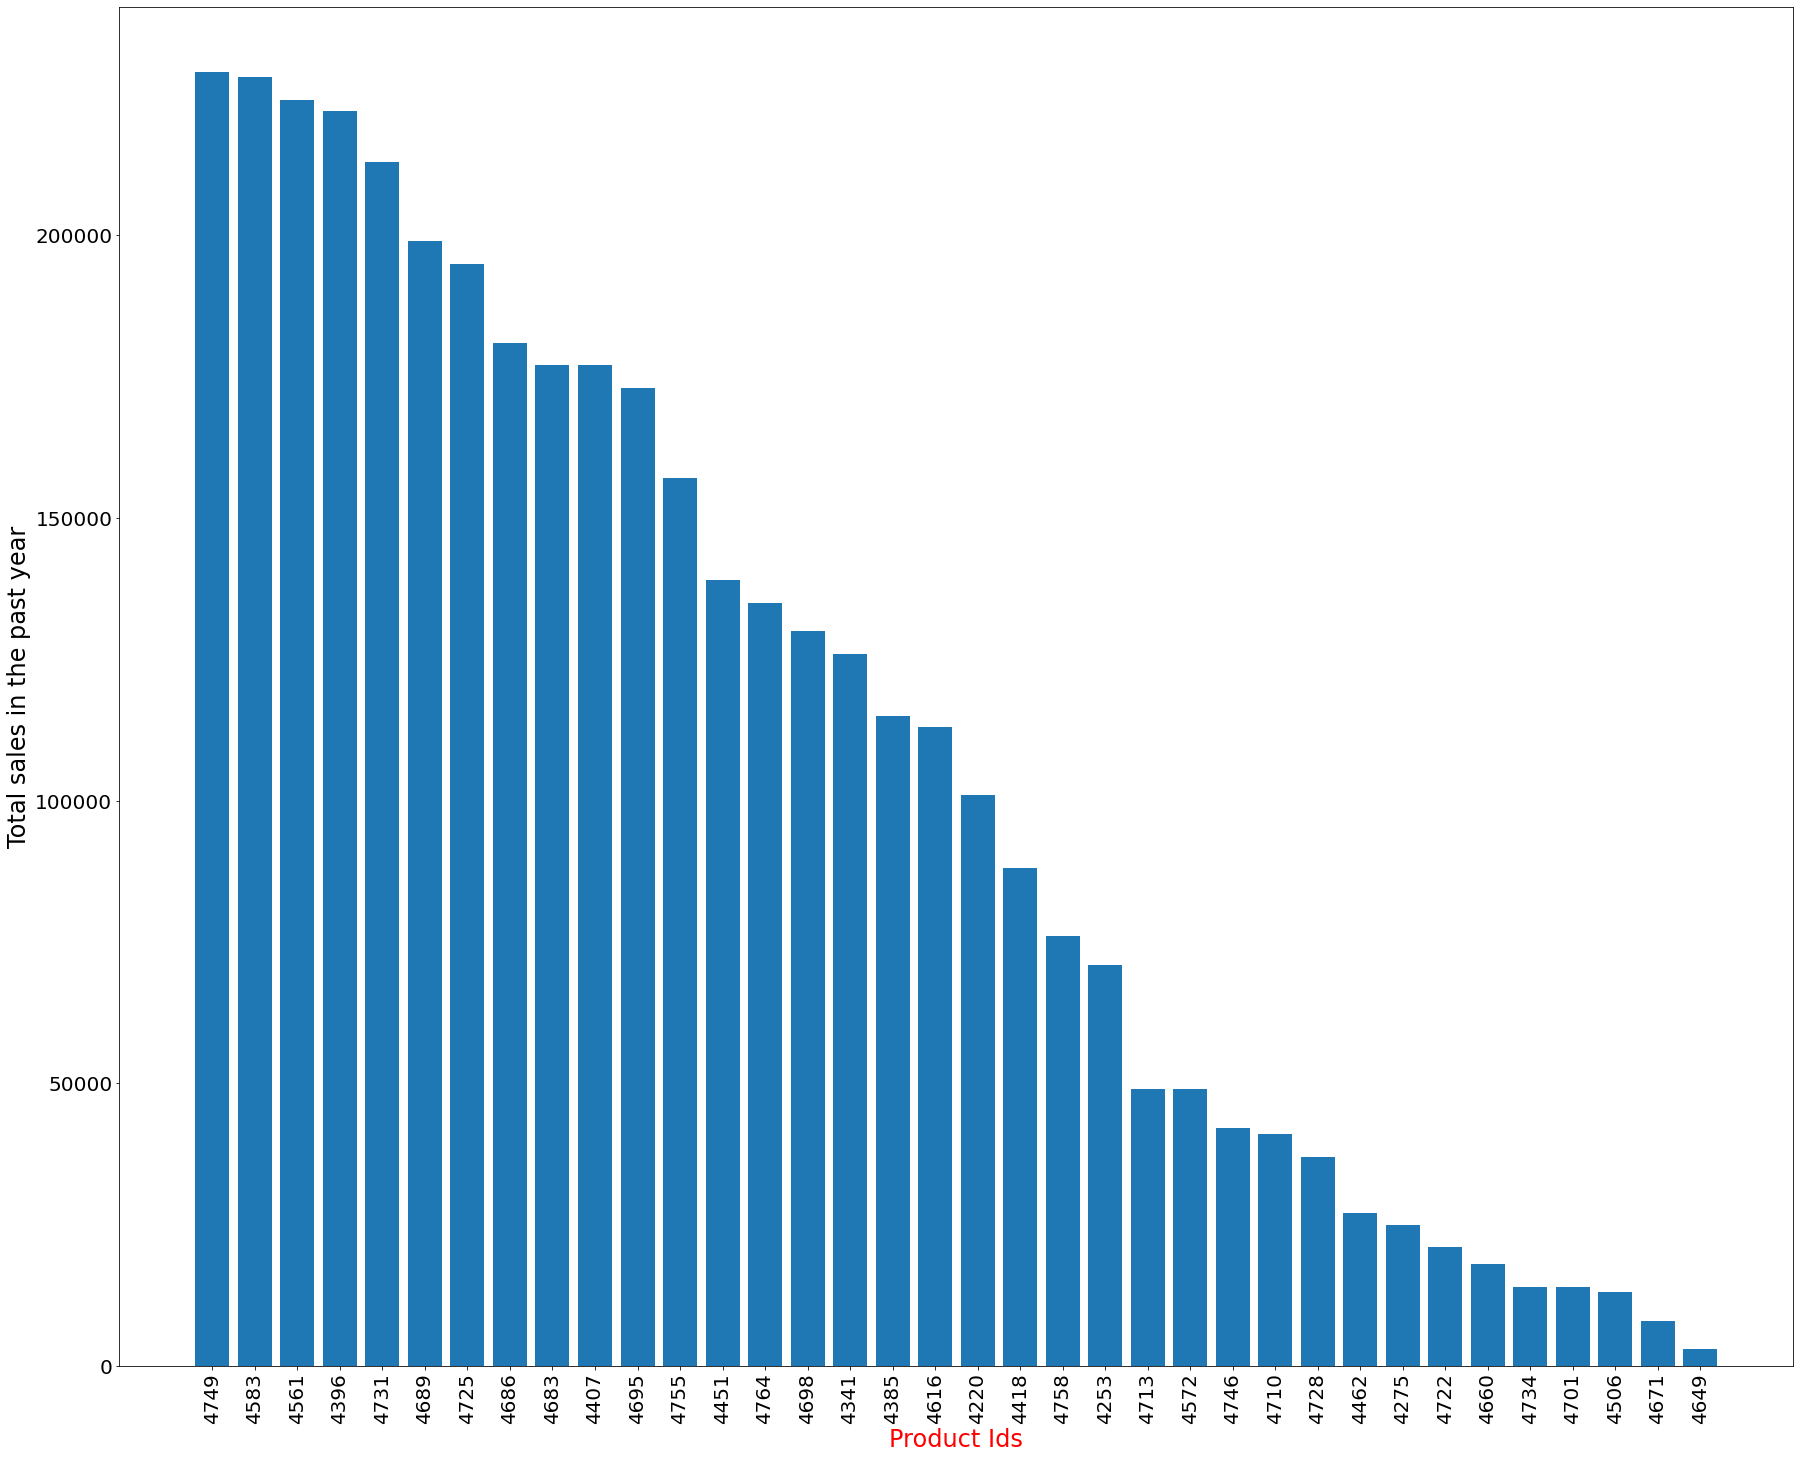

In [30]:
plt.figure(figsize=(30,25))
plt.bar(food_cat['product_id'],food_cat['sales'],label='Products and their sales for food category')
plt.xlabel('Product Ids',fontsize=24,color='r')
plt.ylabel('Total sales in the past year',fontsize=24)
plt.xticks(rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
plt.show()

View products likely to be purchased again for pet type dog

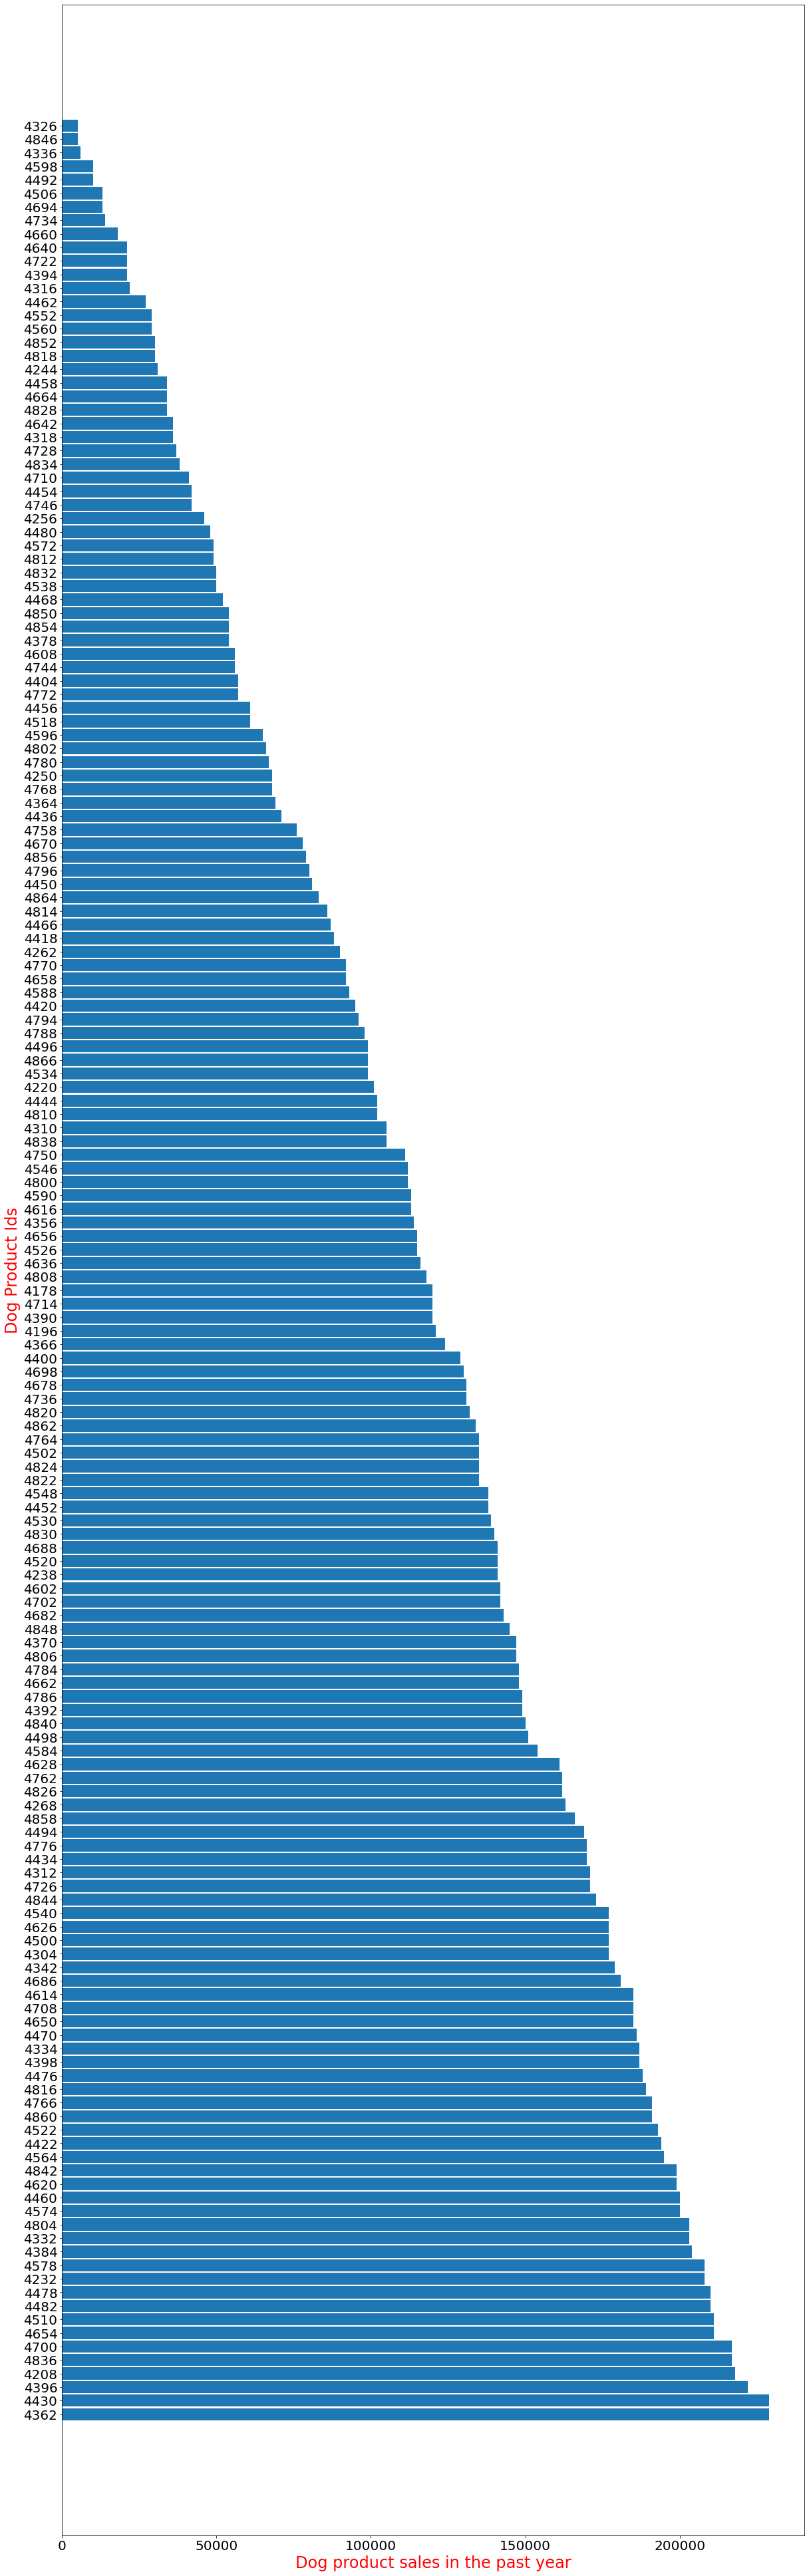

In [31]:
type_dog=group_pet.get_group('dog')
plt.figure(figsize=(20,70))
plt.barh(type_dog['product_id'],type_dog['sales'],label='Products and their sales for dog pet',height=0.9)
plt.ylabel('Dog Product Ids',fontsize=24,color='r')
plt.xlabel('Dog product sales in the past year',fontsize=24,color='r')
plt.yticks(fontsize=20) #rotation='vertical',
plt.xticks(fontsize=20)
plt.savefig('dog-products-1.png')
plt.show()

a plot to visualise Products likely to be sold again for fish pets

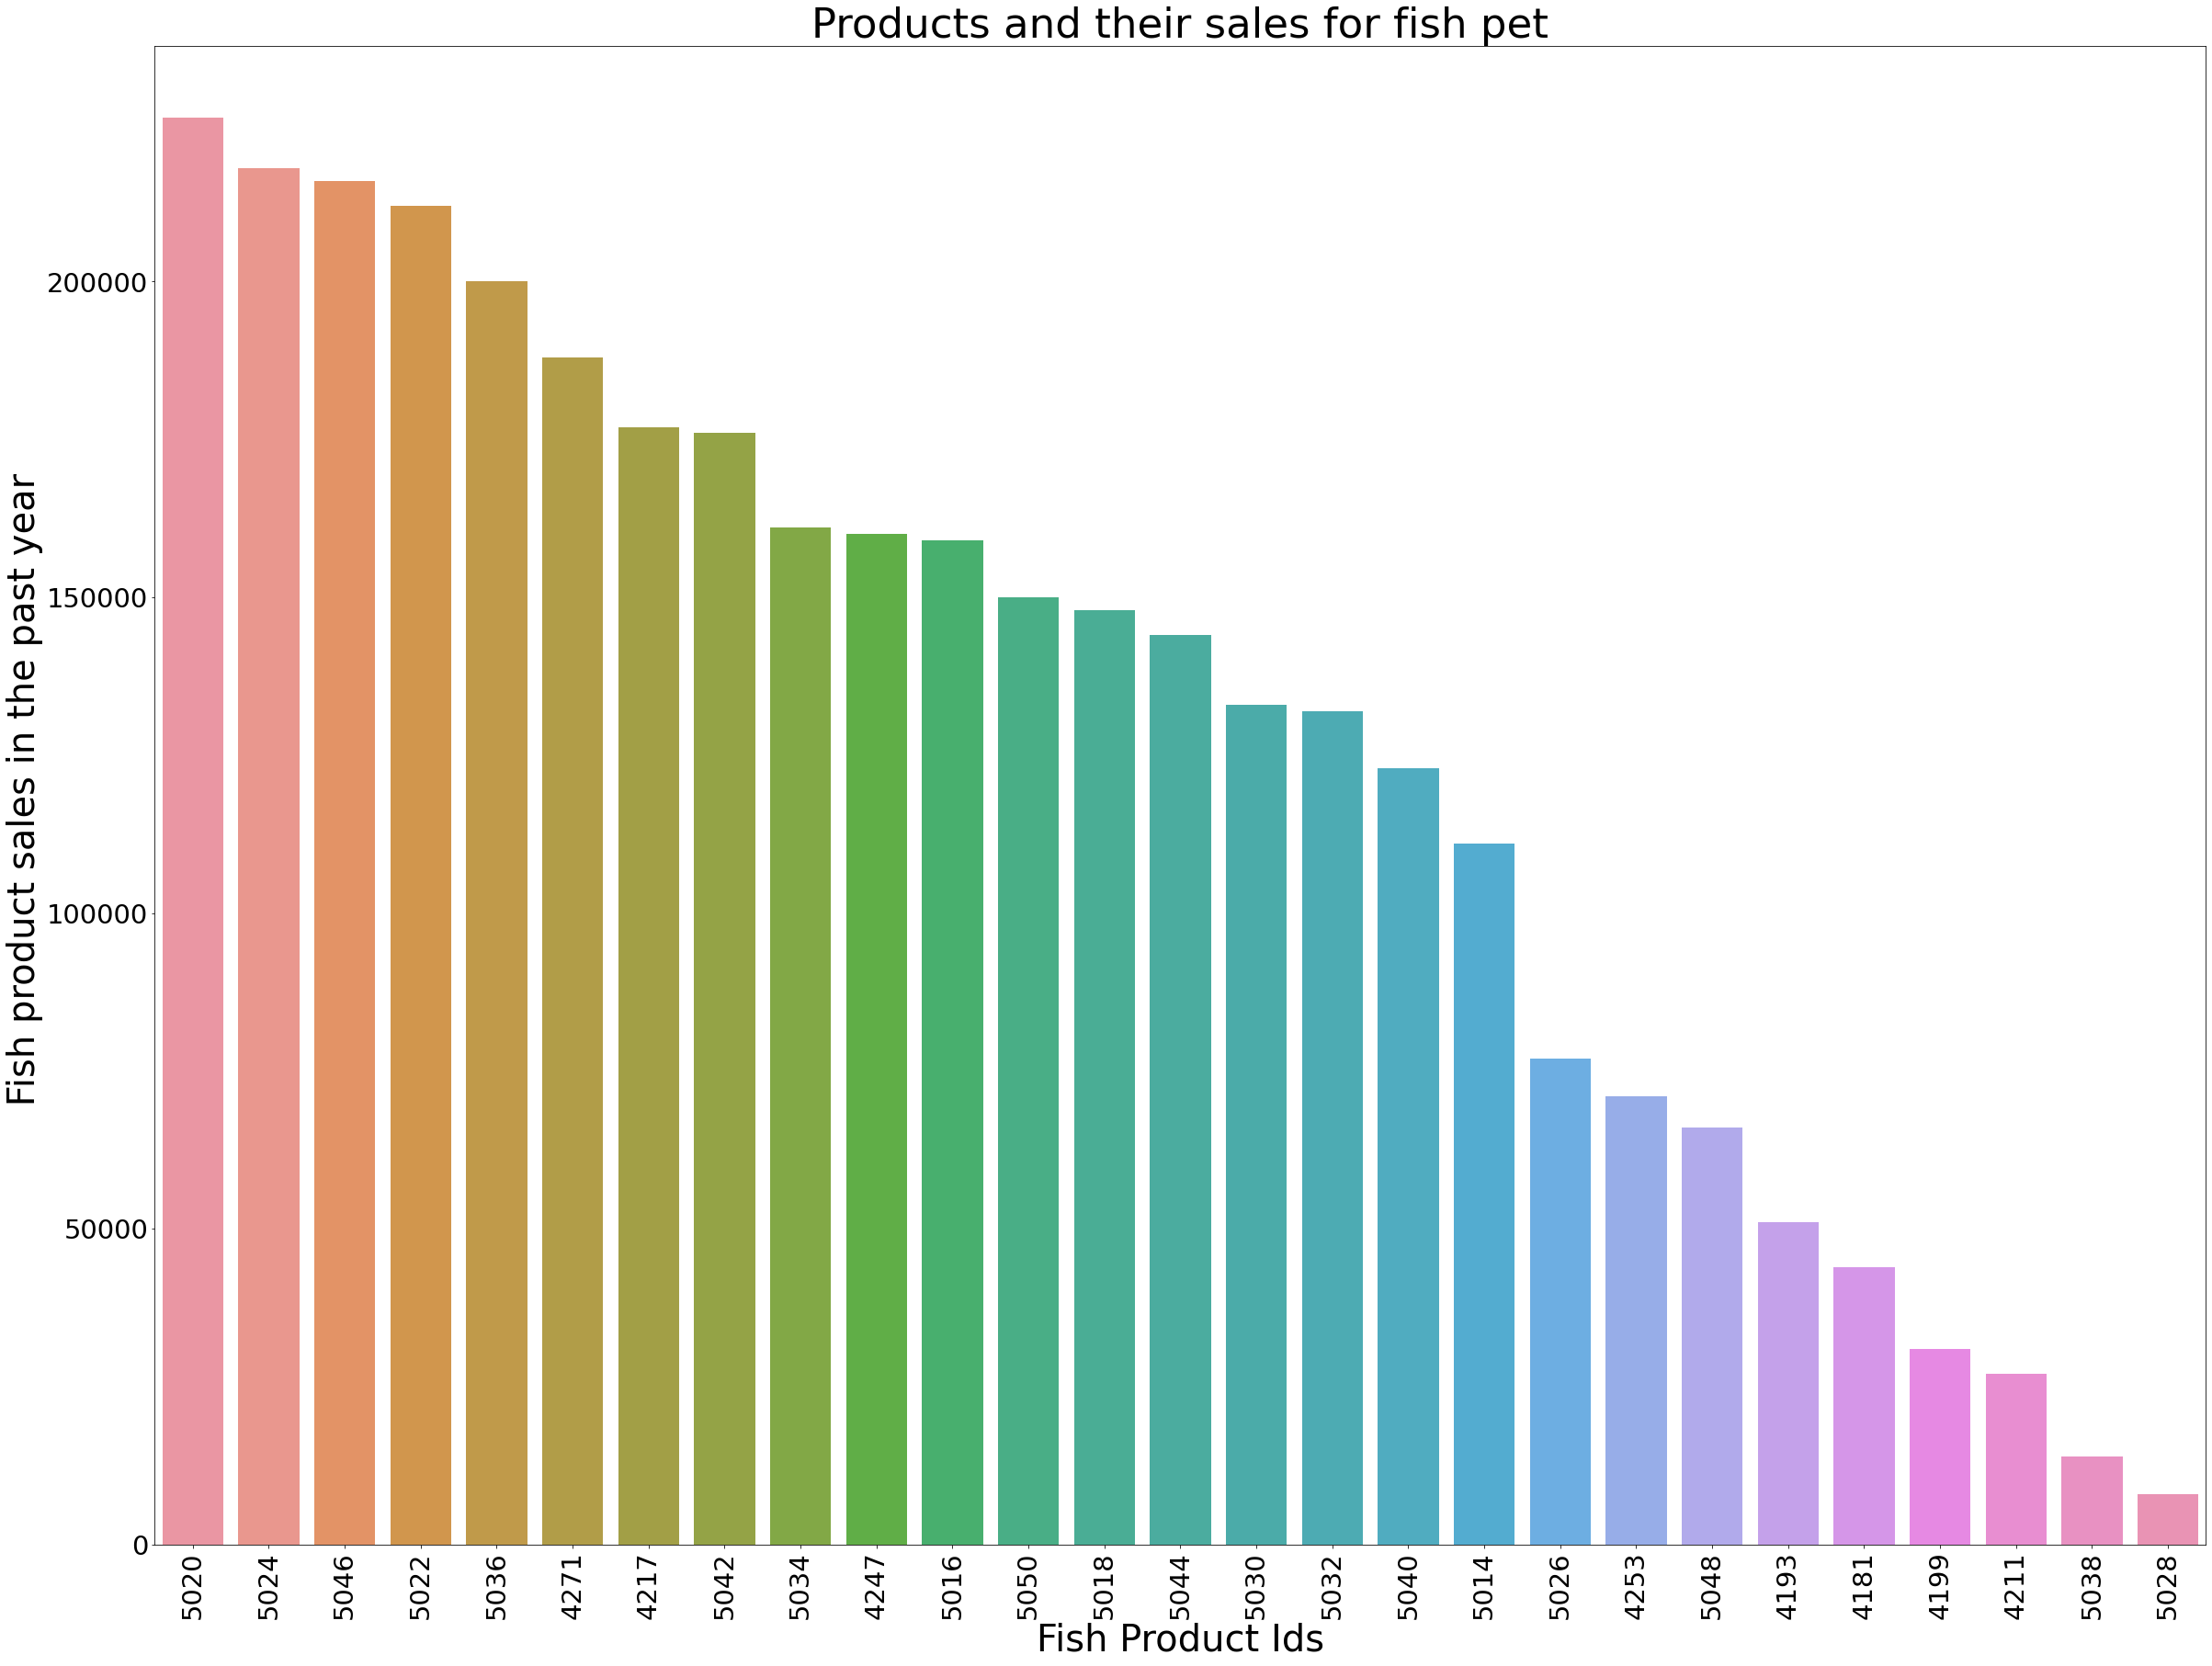

In [32]:
type_fish=group_pet.get_group('fish')
plt.figure(figsize=(40,30))
sns.barplot(x='product_id',y='sales',data=type_fish)
plt.title('Products and their sales for fish pet',fontsize=45)
plt.xlabel('Fish Product Ids',fontsize=40)
plt.ylabel(' Fish product sales in the past year',fontsize=40)
#plt.yticks(fontsize=20) #rotation='vertical',
plt.xticks(fontsize=29,rotation='vertical')
plt.yticks(fontsize=29)
plt.savefig('fish-products-1.png')
plt.show()

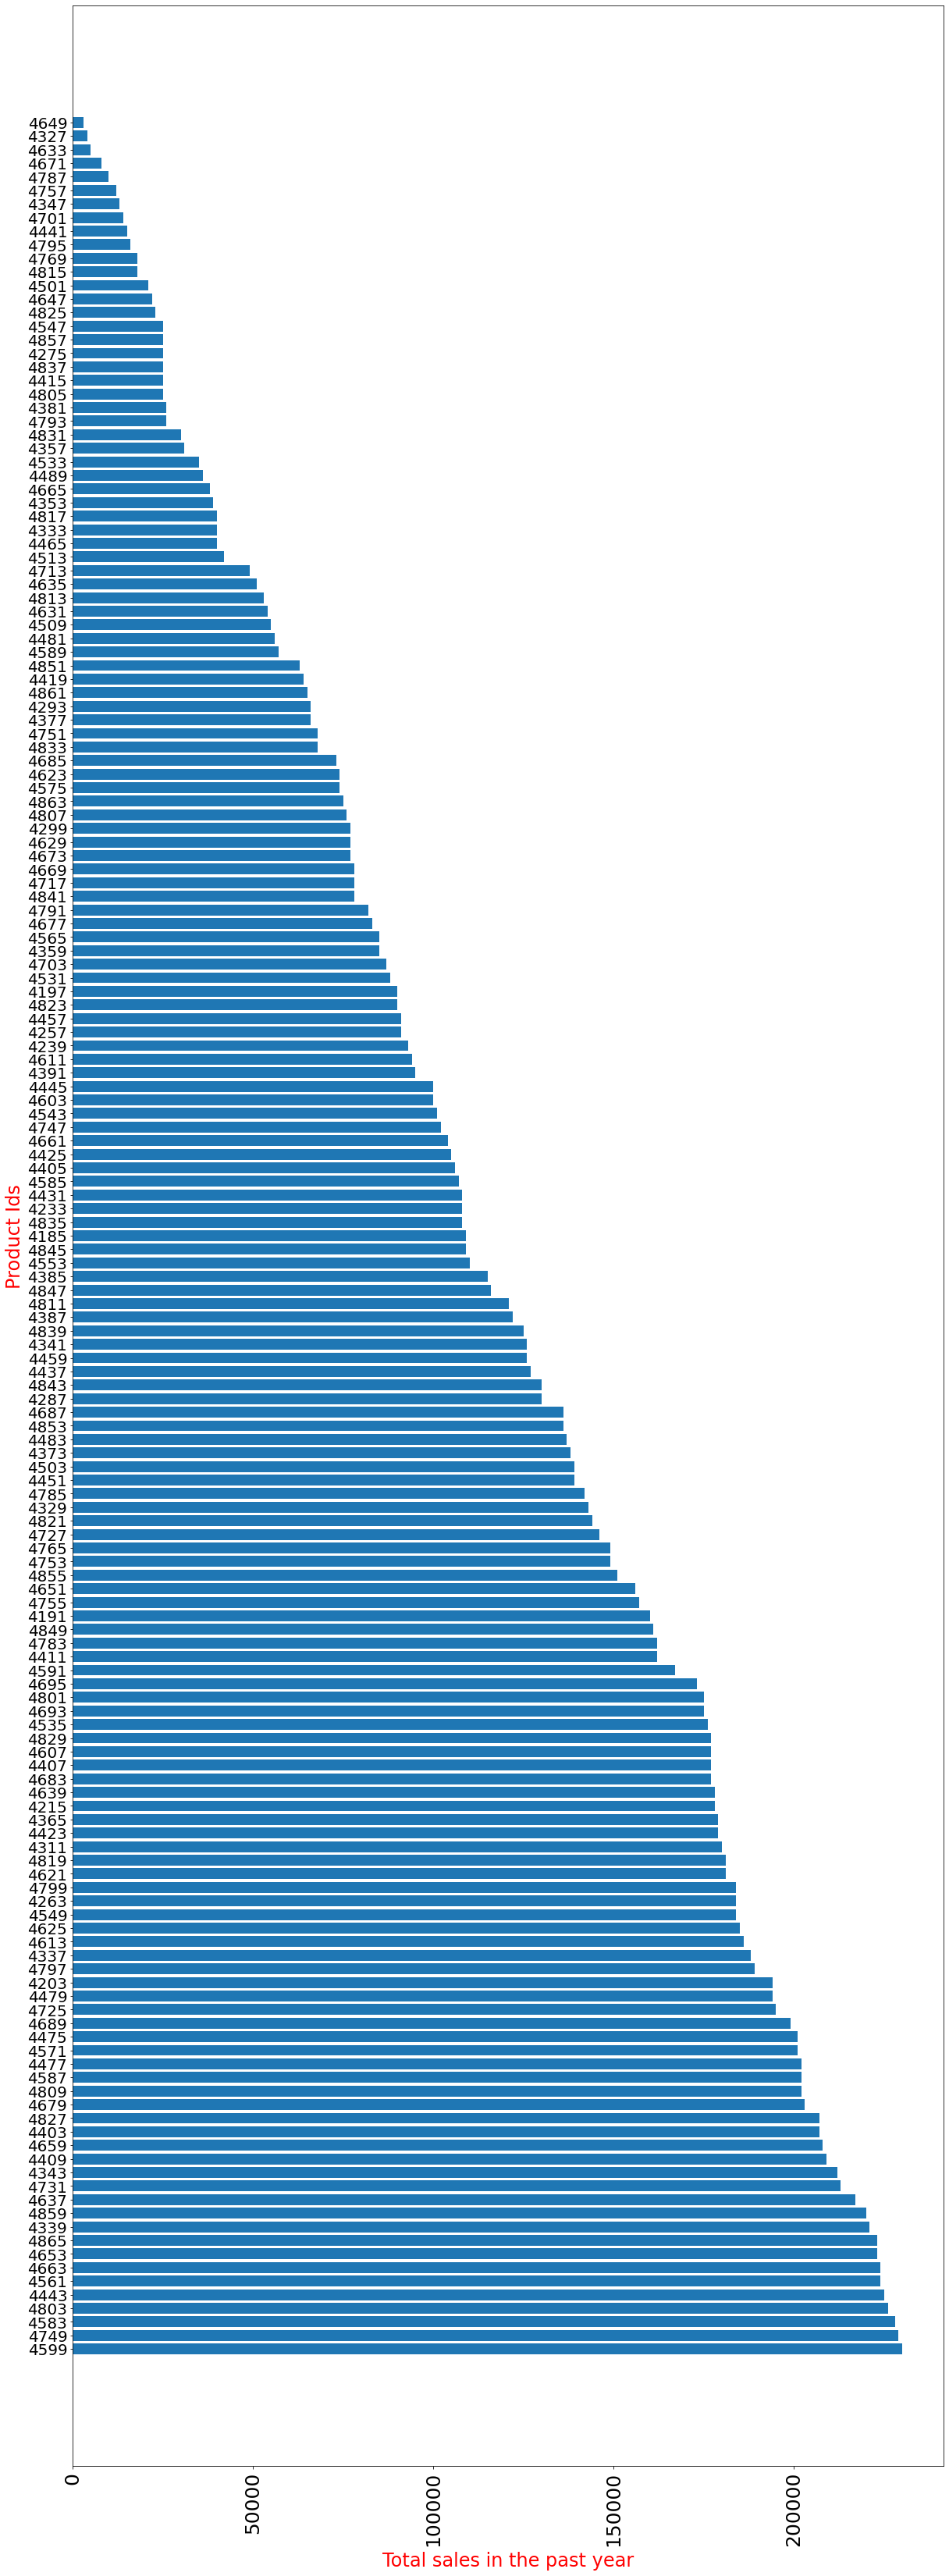

In [33]:
type_cat=group_pet.get_group('cat')
plt.figure(figsize=(20,58))
plt.barh(type_cat['product_id'],type_cat['sales'],label='Products and their sales for cat pet',height=0.8)
plt.ylabel('Product Ids',fontsize=24,color='r')
plt.xlabel('Total sales in the past year',fontsize=24,color='r',labelpad=7)
plt.yticks(fontsize=20) #rotation='vertical',
plt.xticks(fontsize=25,rotation=90)
plt.savefig('cat-products.png')
plt.show()

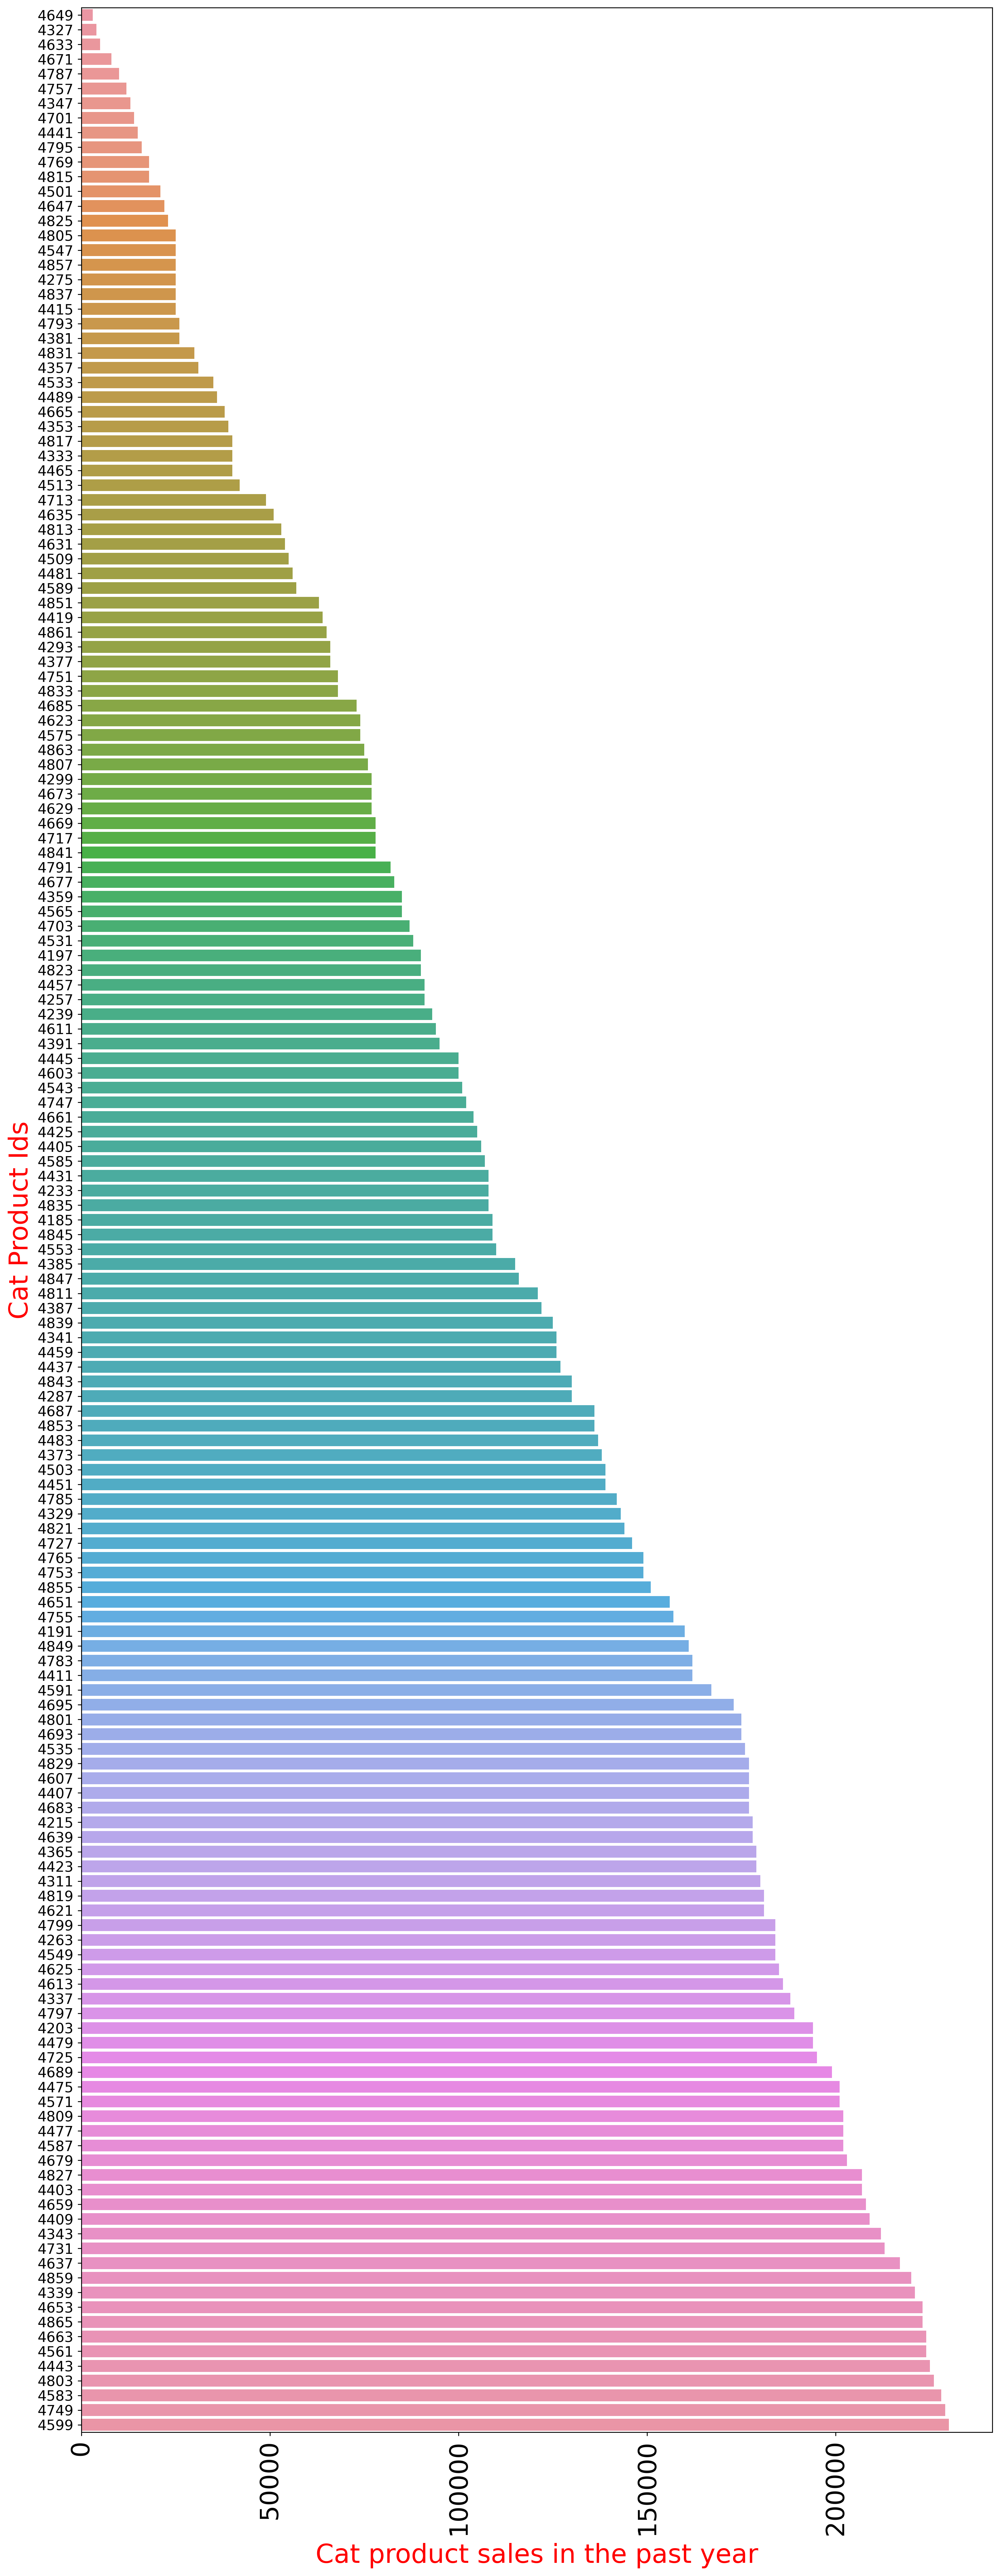

In [34]:
type_cat=type_cat.sort_values(by='sales')
plt.figure(figsize=(15,41), dpi=256, facecolor='w', edgecolor='r')
sns.barplot(data=type_cat,y='product_id',x='sales')
plt.xticks(fontsize=23,rotation='vertical')
plt.yticks(fontsize=13)
plt.xlabel('Cat product sales in the past year',fontsize=24,color='r',labelpad=7)
plt.ylabel('Cat Product Ids',fontsize=24,color='r')
plt.show()

I have found the answers to my questions. Now I want to do some more visualization to gather some more info on the data

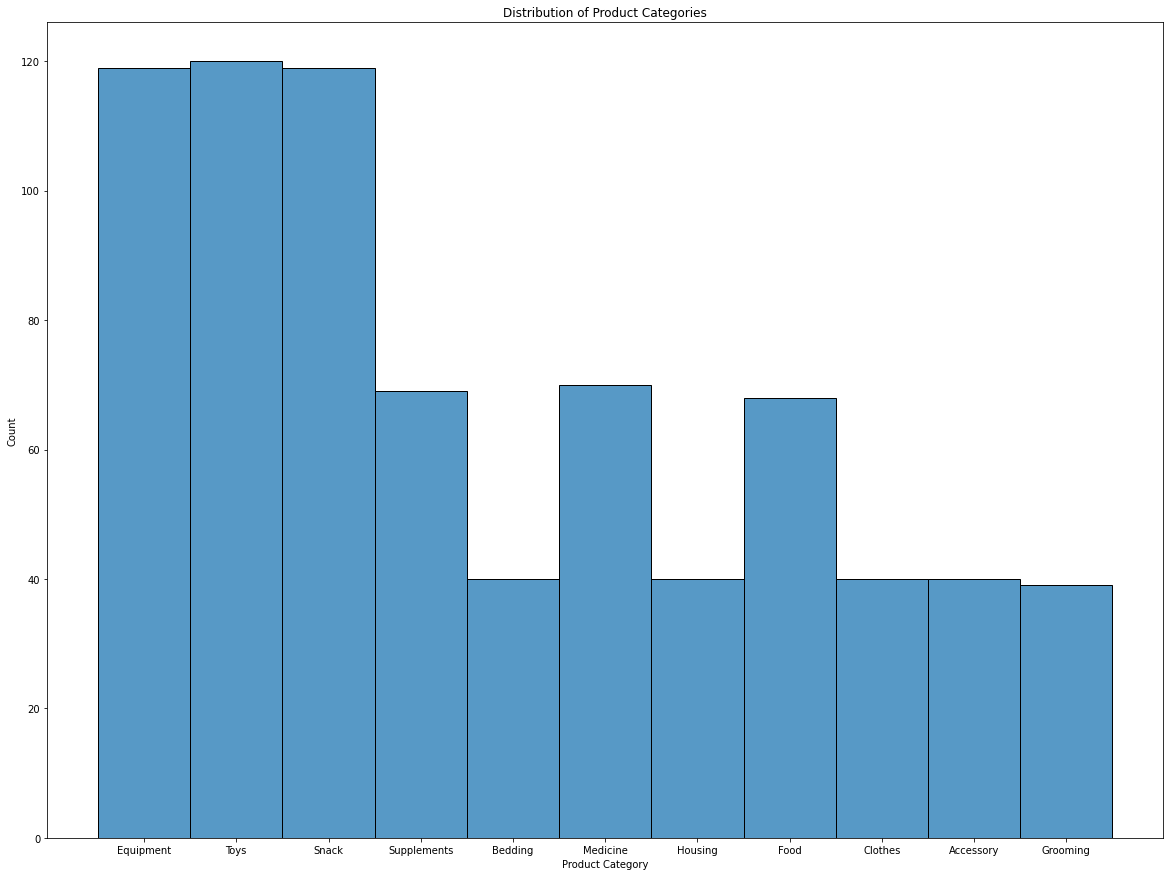

In [35]:
#data['product_category']
plt.figure(figsize=(20,15))
sns.histplot(data, x='product_category')
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.show()

Toys are the highest number of products produced by this company

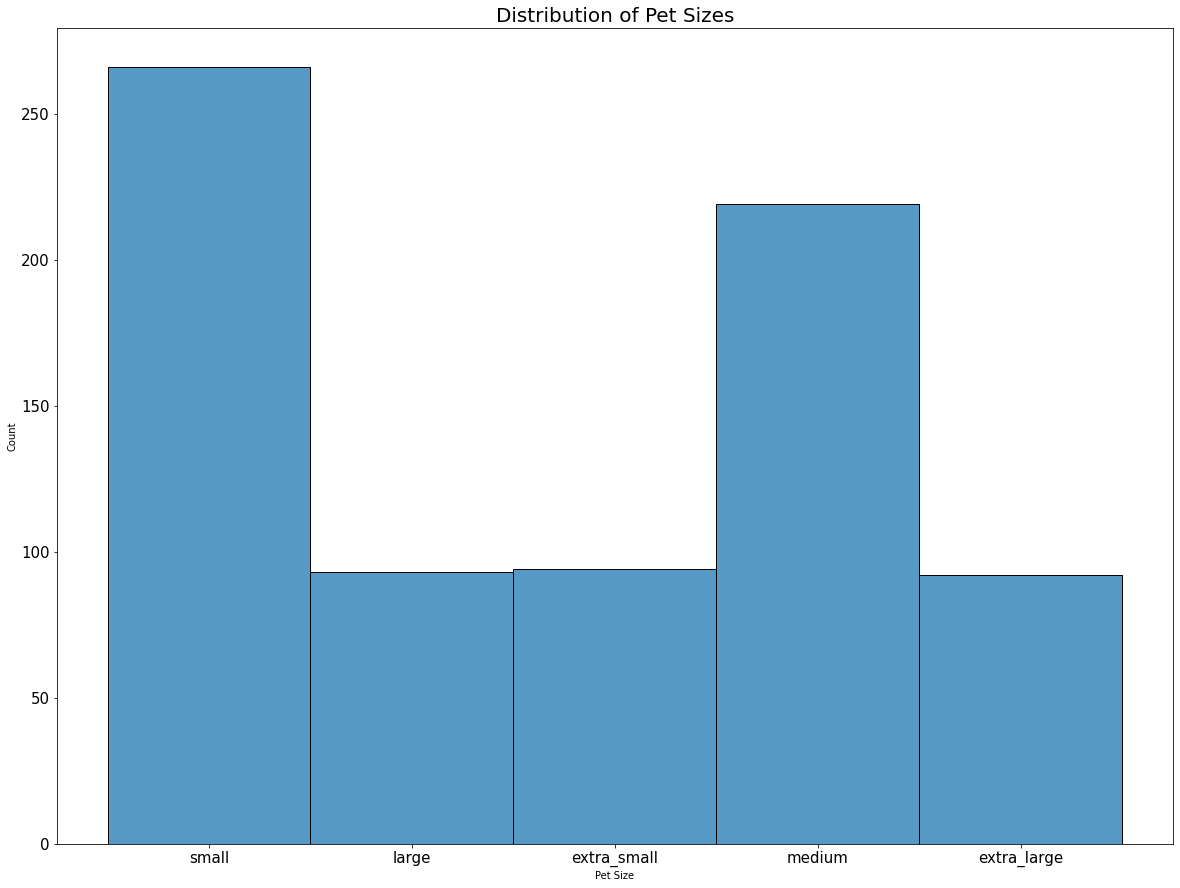

In [36]:
#data['product_category']
plt.figure(figsize=(20,15))
sns.histplot(data, x='pet_size')
plt.title('Distribution of Pet Sizes',fontsize=20)
plt.xlabel('Pet Size')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Small pet size products are the highest in number

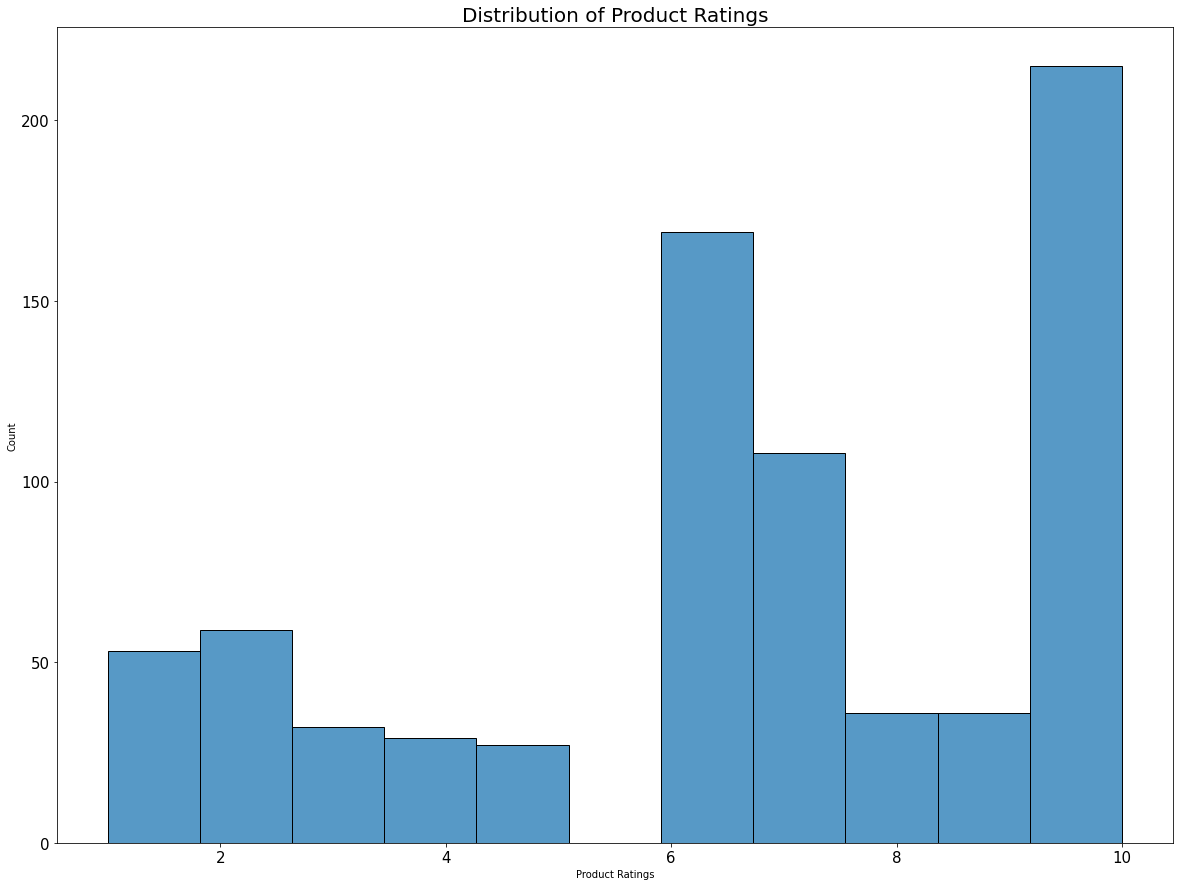

In [37]:
plt.figure(figsize=(20,15))
sns.histplot(data.sort_values(by='rating',ascending=False), x='rating')
plt.title('Distribution of Product Ratings',fontsize=20)
plt.xlabel('Product Ratings')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Also, I find that  
* More than 200 of the products have a rating of 10
* Majority of products have a high rating (10)

In [38]:
categories = data['product_category'].unique()
group_data_by_cat=data.groupby('product_category')
sales_by_category=[]
# I will create an array of the total sales for each category
for category in categories:
    tot_sales=group_data_by_cat.get_group(category)['sales'].sum()
    sales_by_category.append(tot_sales)  

In [39]:
sales_by_category

[14094000,
 12474000,
 13814000,
 7601000,
 5152000,
 8632000,
 4278000,
 7223000,
 5002000,
 5419000,
 4777000]

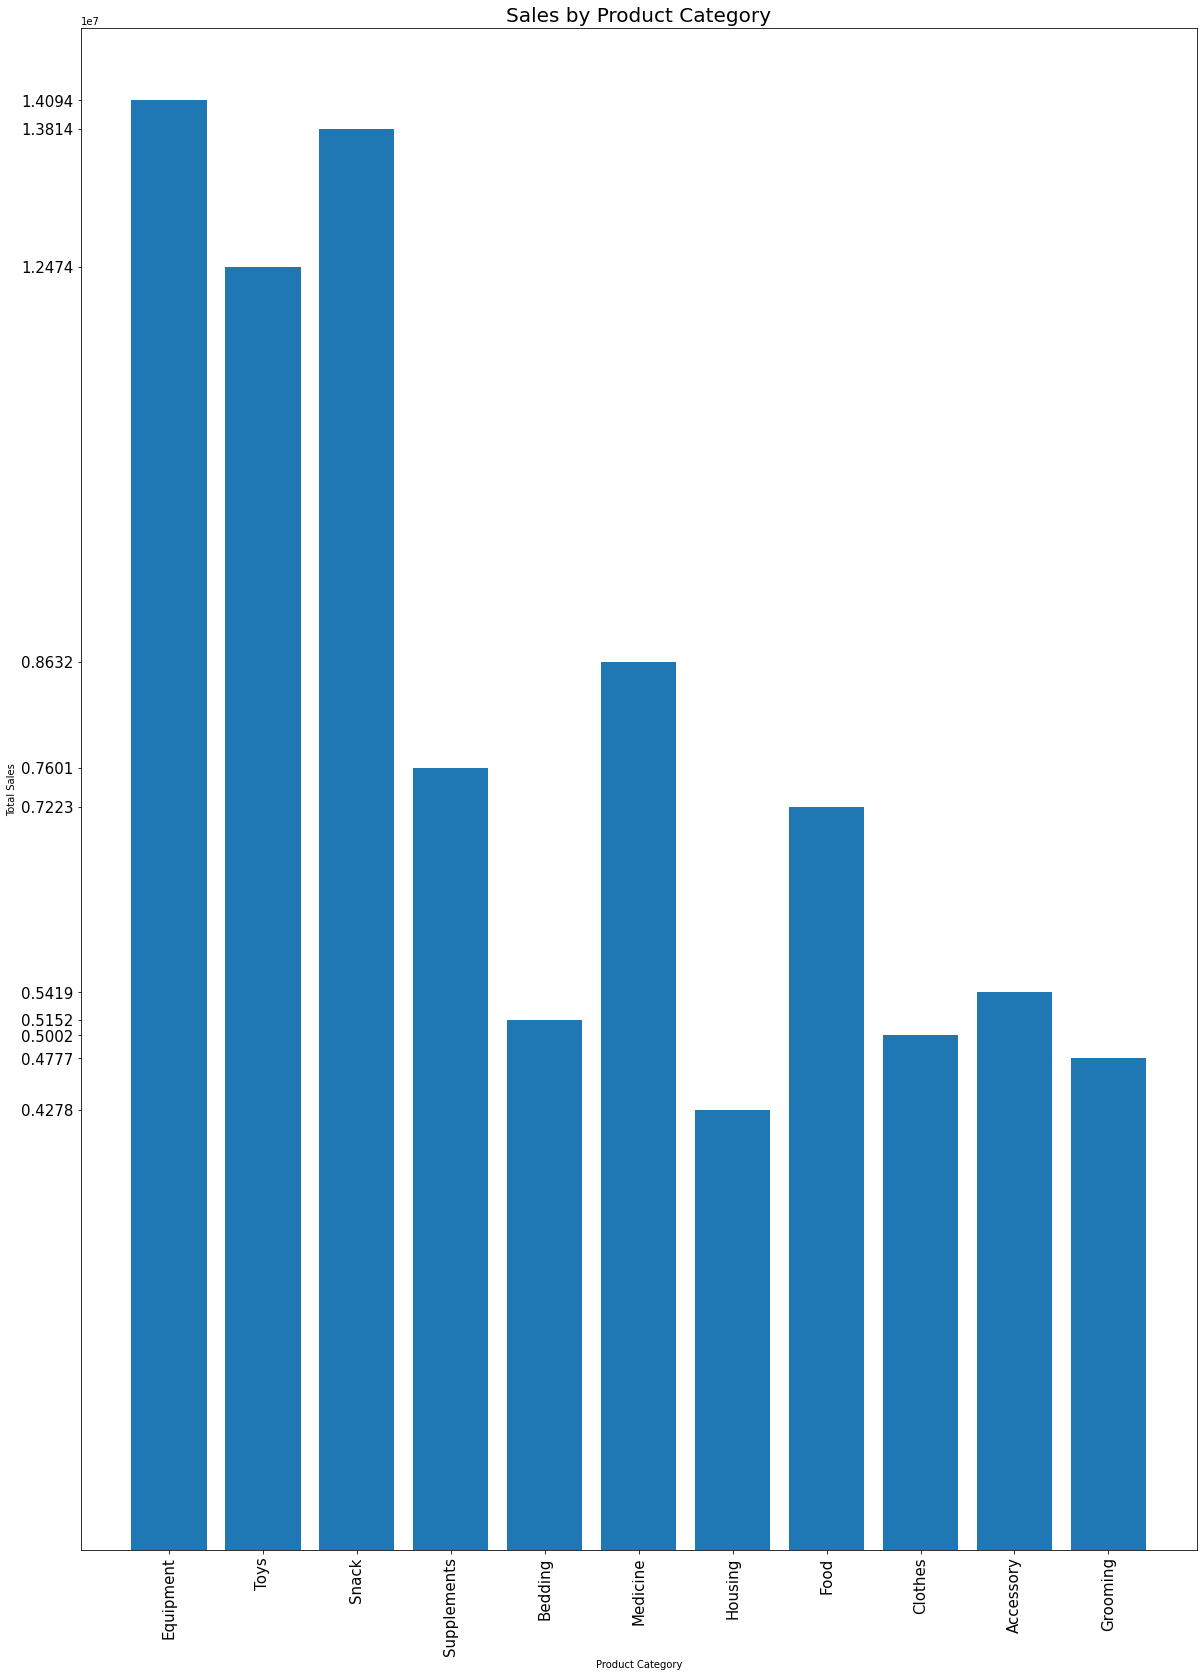

In [40]:
# now time for plotting

plt.figure(figsize=(20,28))
plt.bar( categories,sales_by_category)
plt.title('Sales by Product Category',fontsize=20)
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(fontsize=15,rotation=90)
plt.yticks(sales_by_category,fontsize=15)
plt.show()